### **Import Libraries**

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/content/data.csv")

In [3]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667.0,0.211,0.0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10.0,0.665,-20.096,1.0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4.0,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533.0,0.341,0.0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7.0,0.160,-12.441,1.0,Clancy Lowered the Boom,5.0,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062.0,0.166,0.0,1o6I8BglA6ylDMrIELygv1,0.913000,3.0,0.101,-14.850,1.0,Gati Bali,5.0,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000.0,0.309,0.0,3ftBPsC5vPBKxYSee08FDH,0.000028,5.0,0.381,-9.316,1.0,Danny Boy,3.0,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693.0,0.193,0.0,4d6HGyGT8e121BsdKmw9v6,0.000002,3.0,0.229,-10.096,1.0,When Irish Eyes Are Smiling,2.0,1921,0.0380,101.665


In [4]:
data.shape

(5756, 19)

In [5]:
data.isna().sum()

valence             0
year                0
acousticness        1
artists             1
danceability        1
duration_ms         1
energy              1
explicit            1
id                  1
instrumentalness    1
key                 1
liveness            1
loudness            1
mode                1
name                1
popularity          1
release_date        1
speechiness         1
tempo               1
dtype: int64

In [6]:
data = data.dropna()


In [7]:
data.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

### **Exploratory Data Analysis**

100%|██████████| 13/13 [00:23<00:00,  1.82s/it]


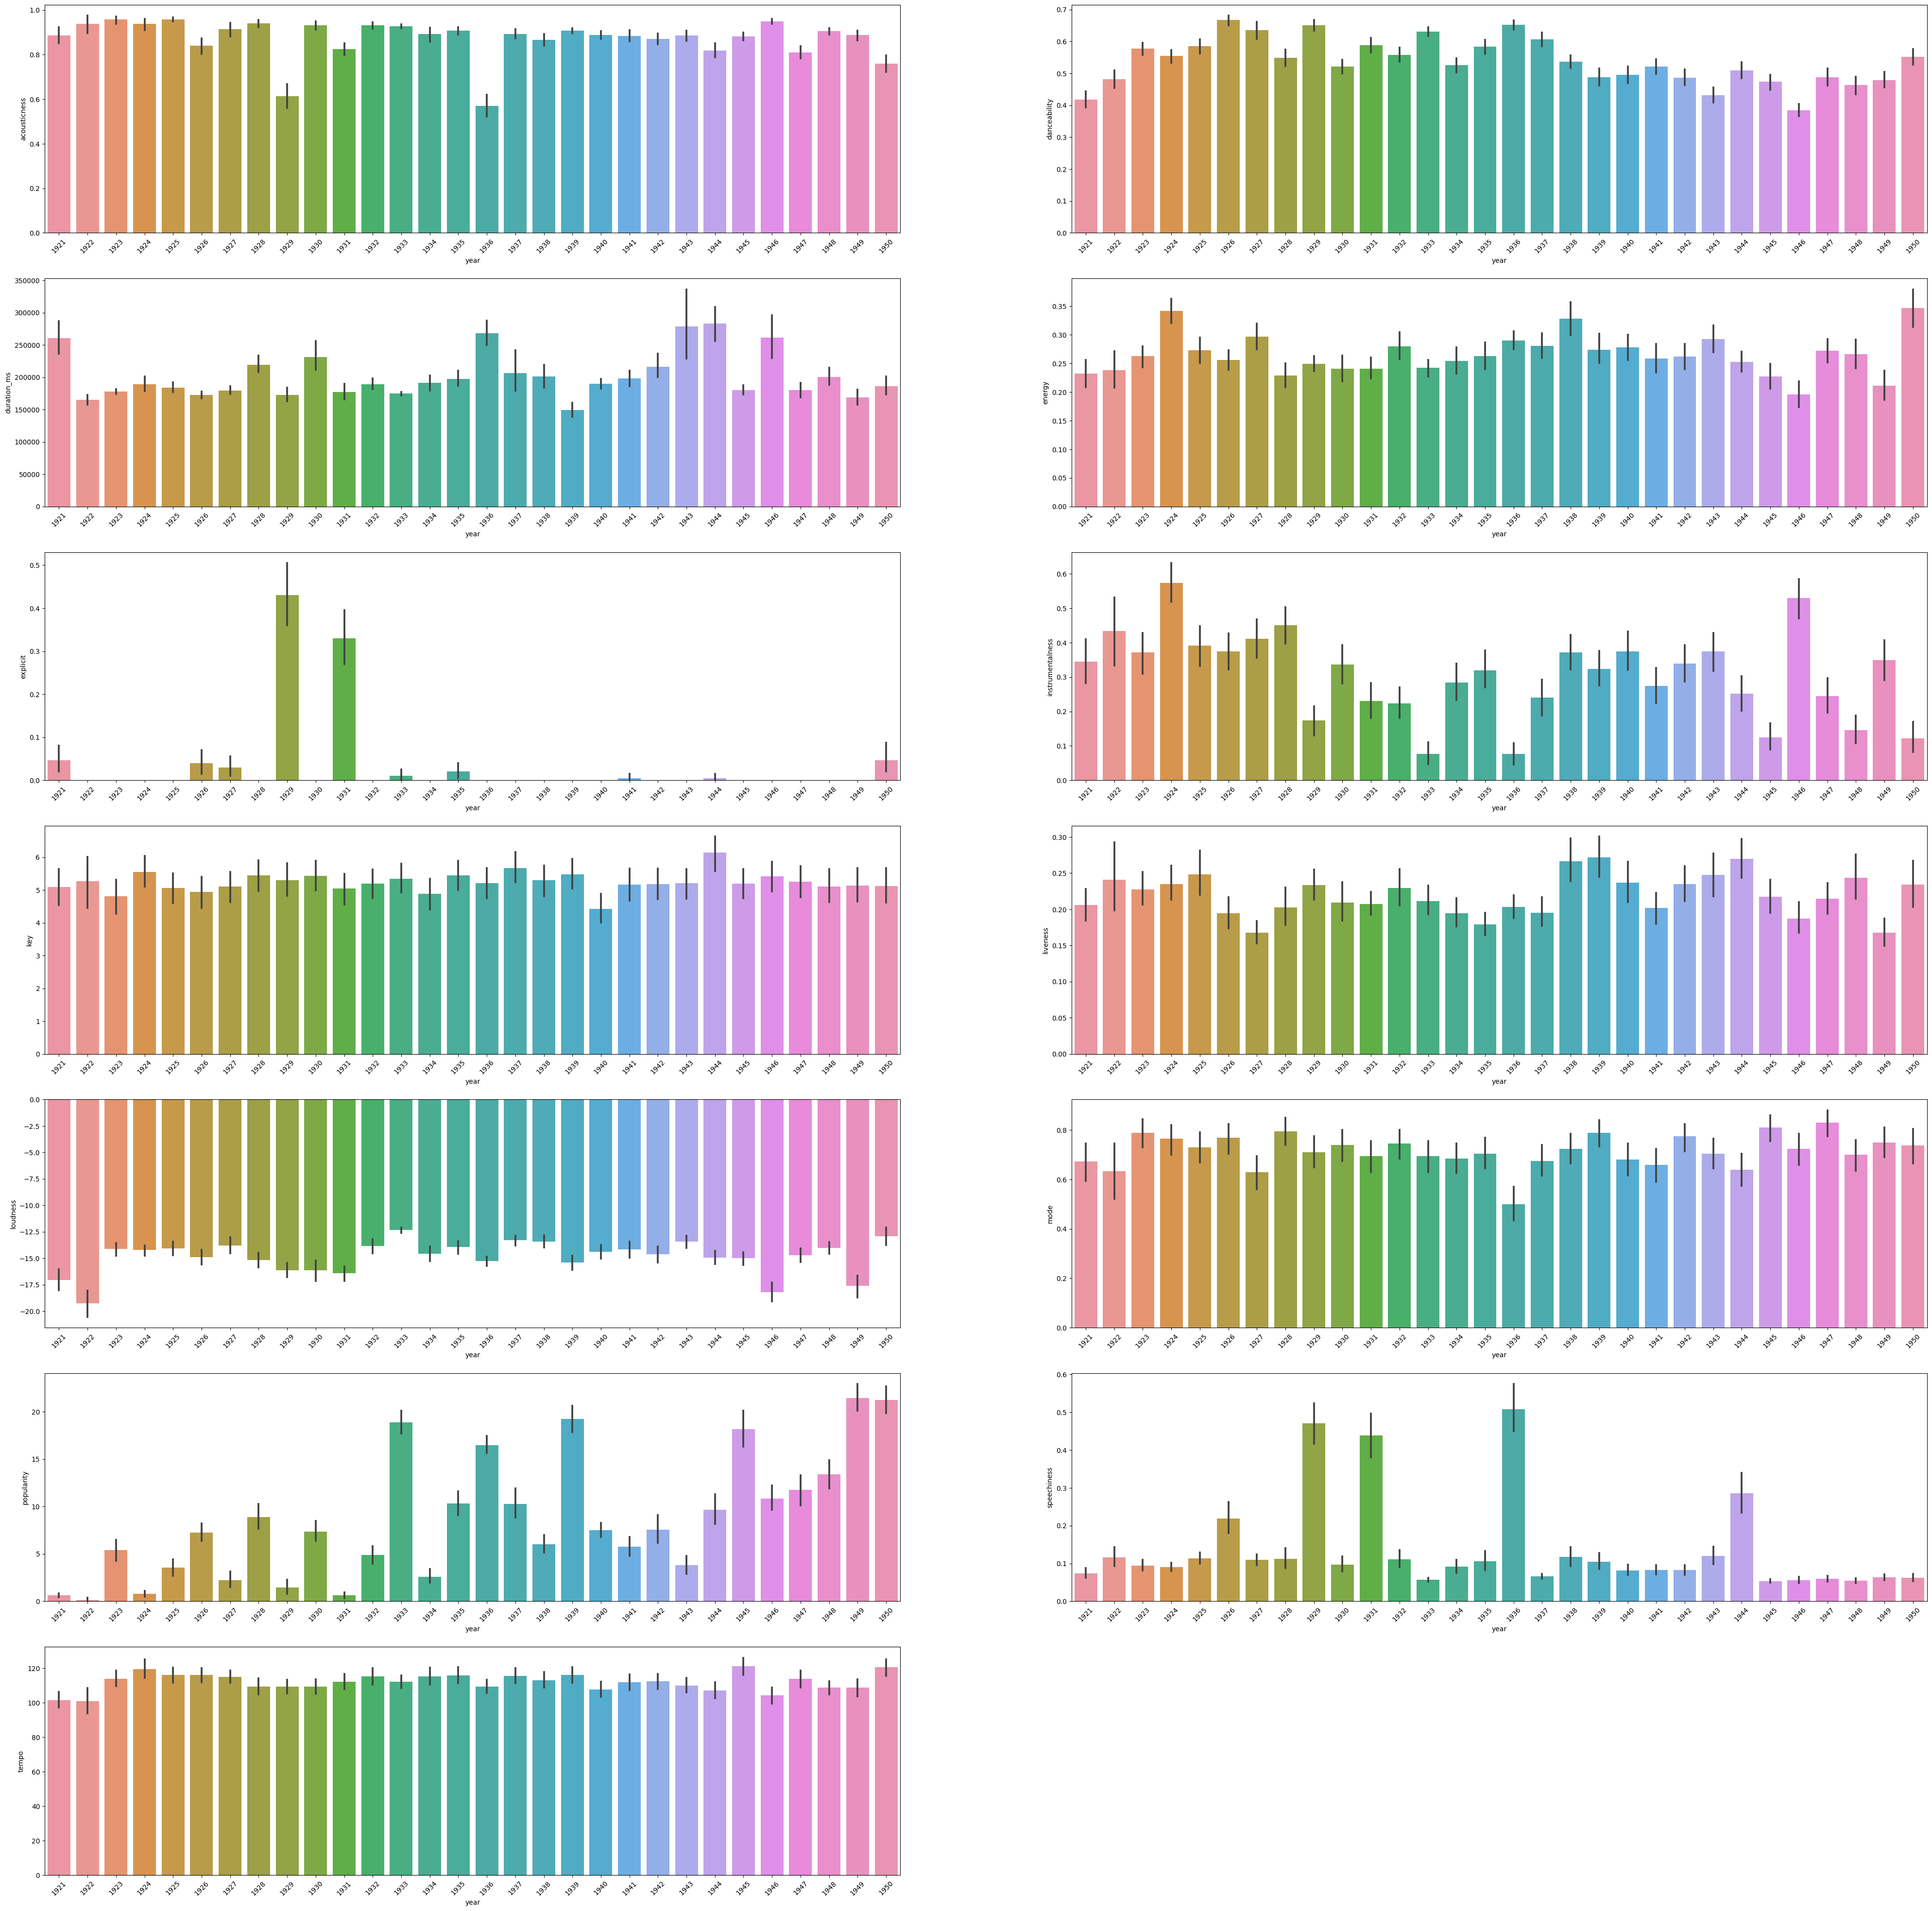

In [8]:
viz_data = data.drop(columns=['id', 'name', 'artists', 'release_date', 'year'])

plt.figure(figsize=(50, 50))
for i in tqdm(np.arange(1, len(viz_data.columns))):
    plt.subplot(7, 2, i)
    sns.barplot(x=data.year,y=viz_data[viz_data.columns[i]])
    plt.xticks(rotation=45);
plt.show()

**Pearson Correlation**

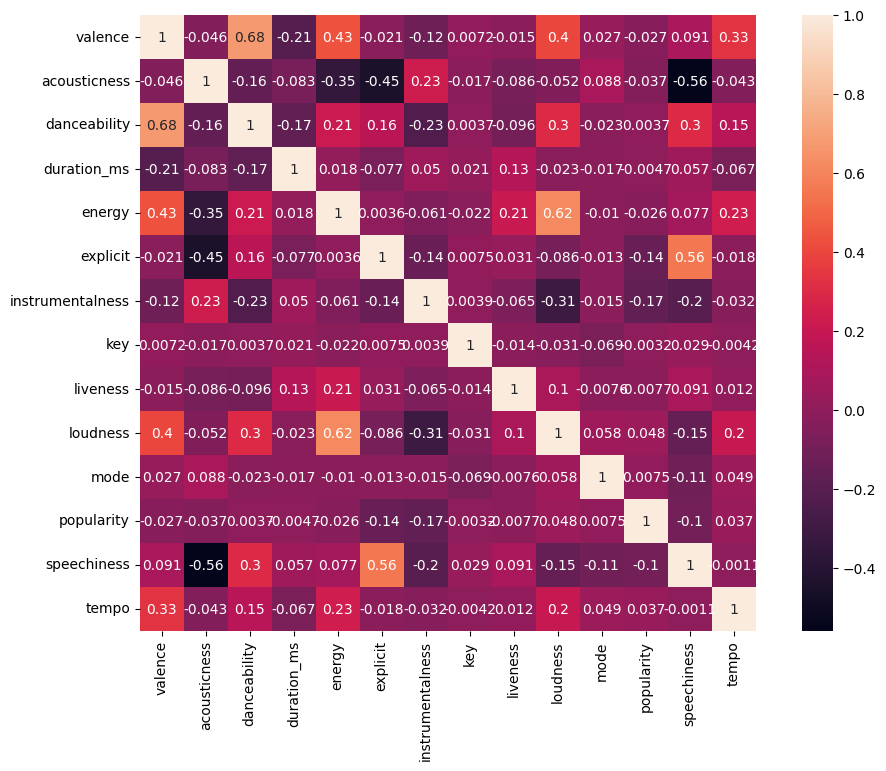

In [9]:
plt.subplots(figsize=(12, 8))
sns.heatmap(viz_data.corr(), annot=True, square=True)
plt.show()

In [10]:
data.head(2)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667.0,0.211,0.0,4BJqT0PrAfrxzMOxytFOIz,0.878,10.0,0.665,-20.096,1.0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4.0,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533.0,0.341,0.0,7xPhfUan2yNtyFG0cUWkt8,0.000,7.0,0.160,-12.441,1.0,Clancy Lowered the Boom,5.0,1921,0.4150,60.936


In [11]:
def normalize_column(col):
    max_d = data[col].max()
    min_d = data[col].min()
    data[col] = (data[col] - min_d)/(max_d - min_d)

In [12]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = data.select_dtypes(include=num_types)

for col in num.columns:
    normalize_column(col)

In [13]:
data.head(3)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.060243,0.0,0.985943,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.298715,0.235369,0.209609,0.0,4BJqT0PrAfrxzMOxytFOIz,0.884189,0.909091,0.665590,0.509977,1.0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0.052632,1921,0.037849,0.365084
1,0.976673,0.0,0.734925,['Dennis Day'],0.876874,0.048765,0.339838,0.0,7xPhfUan2yNtyFG0cUWkt8,0.000000,0.636364,0.139494,0.703085,1.0,Clancy Lowered the Boom,0.065789,1921,0.429162,0.274807
2,0.039959,0.0,0.964857,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.351178,0.140337,0.164530,0.0,1o6I8BglA6ylDMrIELygv1,0.919436,0.272727,0.078029,0.642315,1.0,Gati Bali,0.065789,1921,0.035057,0.497603


In [14]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)
cat = km.fit_predict(num)
data['cat'] = cat
normalize_column('cat')

In [15]:
data.cat[:10]

0    0.222222
1    0.888889
2    1.000000
3    0.888889
4    0.333333
5    0.444444
6    0.333333
7    0.888889
8    0.333333
9    0.888889
Name: cat, dtype: float64

### **Recommendation System**

In [16]:
caya=data[data.name=='Come As You Are']
caya.head(3)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cat


**Spotify Recommendation Function**

In [17]:
class SpotifyRecommender():
    def __init__(self, rec_data):
        self.rec_data_ = rec_data

    def change_data(self, rec_data):
        self.rec_data_ = rec_data

    def get_recommendations(self, song_name, amount=1):
        distances = []
        song_matches = self.rec_data_[(self.rec_data_.name.str.lower() == song_name.lower())]

        if song_matches.empty:
            print("No matching songs found.")
            return

        song = song_matches.head(1).values[0]
        res_data = self.rec_data_[self.rec_data_.name.str.lower() != song_name.lower()]

        for r_song in tqdm(res_data.values):
            dist = 0
            for col in np.arange(len(res_data.columns)):
                if not col in [1, 3, 8, 14, 16]:  # Exclude non-numerical columns
                    try:
                        dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
                    except ValueError:
                        continue  # Skip non-numeric columns
            distances.append(dist)

        res_data['distance'] = distances
        res_data = res_data.sort_values('distance')
        columns = ['artists', 'name']
        return res_data[columns][:amount]




In [18]:
recommender = SpotifyRecommender(data)

**Song 1 - The Wearing of the Green**

In [19]:
recommender.get_recommendations('The Wearing of the Green', 5)

100%|██████████| 5754/5754 [00:00<00:00, 17932.47it/s]


,artists,name
3107,"['Billie Holiday', 'Count Basie']",I Can't Get Started - Live
3082,['Billie Holiday'],Don't Know If I'm Comin' or Goin' - Take 1
3793,['Count Basie'],I Want a Little Girl
2384,"['Billie Holiday', 'Count Basie']",I Can't Get Started - Live
3765,['Billie Holiday'],Am I Blue? - Take 3


**Song 2 - Too Busy**

In [20]:
recommender.get_recommendations('Too Busy', 5)

100%|██████████| 5754/5754 [00:00<00:00, 23804.90it/s]


,artists,name
4003,"['Francisco Canaro', 'Ernesto Fama']",Copa de Ajenjo - Remasterizado
437,"['Bix Beiderbecke', 'Bix Beiderbecke And His O...",I Don't Mind Walking in the Rain (If I'm Walki...
3727,"['Billie Holiday', 'Eddie Heywood']",Romance In the Dark (with Eddie Heywood & His ...
746,['Dranem'],Raymonde
1492,['Carroll Gibbons'],All By Yourself in the Moonlight (Carroll Gibb...
